### Clusteranalyse der BVG-Pressemitteilungen

In diesem Notebook erfolgt eine thematische Clusteranalyse auf Basis der bereinigten Wortfrequenzen aus den Pressemitteilungen der BVG.  
Ziel ist es, über gruppierte Begriffe zentrale Themenfelder und Entwicklungen in der öffentlichen Kommunikation der BVG sichtbar zu machen.

Es werden zwei unterschiedliche Clusteransätze verwendet:
- Top-down-Ansatz: Die Begriffe wurden aus der Rubrik „Unternehmen“ auf der offiziellen BVG-Website abgeleitet. Dort benannte Werte und strategische Ziele bilden die Grundlage für die thematische Zuordnung.
- Bottom-up-Ansatz: Die häufigsten Begriffe der Top-50-Wortfrequenzliste wurden explorativ zu inhaltlich sinnvollen Clustern zusammengefasst.

Visualisiert und untersucht werden:
- Die Gesamthäufigkeit der Cluster über alle Jahre
- Die Entwicklung der Cluster im Zeitverlauf (2021–2025)
- Die jährliche Entwicklung ausgewählter Begriffe innerhalb der Cluster

#### 1. Import benötigte Pakete

In [68]:
# Standard
import os
import pandas as pd

import sys  # Systemfunktionen 

# Eigene Funktionen (ausgelagert)
import sys  # Systemfunktionen 
sys.path.append("../scripts") # Pfad zu den Funktionen
# Funktionen aus clusteranalyse.py importieren
from clusteranalyse import cluster_trend_table, cluster_trend_plot, cluster_totals, plot_cluster_totals, plot_cluster_by_year, cluster_totals_by_year

In [69]:
# Pfade
# Projektverzeichnis 
PROJECT_ROOT = r"D:/DBU/ADSC11 ADS-01/Studienarbeit/newspaper-scraping"

# Eingabedaten: CSV-Datei mit bereinigten Pressetexten
DATAPATH = os.path.join(PROJECT_ROOT, "output", "pm_bvg_clean_final.csv")

# Output 
OUTPUT_PATH = os.path.join(PROJECT_ROOT, "output")

#### 2. Datenexploration

In [70]:
# CSV-Datei einlesen 
df_bvg_clean = pd.read_csv(DATAPATH)

In [71]:
# Überblick df_pm
df_bvg_clean.head()

,count,word,source,date
0,7,werden,bvg_pm,2021-08-06
1,4,technologien,bvg_pm,2021-08-06
2,4,daten,bvg_pm,2021-08-06
3,3,bvg,bvg_pm,2021-08-06
4,2,werbung,bvg_pm,2021-08-06


In [72]:
# Anzahl Zeilen und Spalten
df_bvg_clean.shape

(50642, 4)

In [73]:
# Fehlende Werte 
df_bvg_clean.isna().sum()

count     0
word      0
source    0
date      0
dtype: int64

#### 3. Analyse der Wortverwendung in Pressemitteilungen

In [74]:
# Vorbereitung: neue Spalte year
df_bvg_clean["year"] = pd.to_datetime(df_bvg_clean["date"]).dt.year

In [75]:
# Prüfung
df_bvg_clean.columns

Index(['count', 'word', 'source', 'date', 'year'], dtype='object')

##### 3.1 Top-down-Perspektive: Themen basierend auf der BVG-Selbstdarstellung

In [76]:
# Cluster und Begriffe definieren
clusters_topdown = {
    "Mobilität & Infrastruktur": ["verkehr", "nahverkehr", "linie", "netz", "ausbau", "vernetzung", "mobilitätswende", "mobilität", "pünktlichkeit", "verlässlichkeit", "flexibel"],
    "Innovation & Digitalisierung": ["innovation", "zukunft", "digital", "app", "technologie"],
    "Ökologie & Nachhaltigkeit": ["klimaschutz", "umwelt", "nachhaltigkeit", "co2", "ökologisch"],
    "Barrierefreiheit & Inklusion": ["barrierefrei", "aufzug", "inklusion", "vielfalt"],
    "Diversität & Verantwortung": ["vielfalt", "diversität", "wertschätzung", "gesellschaft", "verantwortung"],
    "Mitarbeitende & Arbeitgeberin": ["mitarbeitende", "beschäftigte", "zufriedenheit", "motivation"]
}

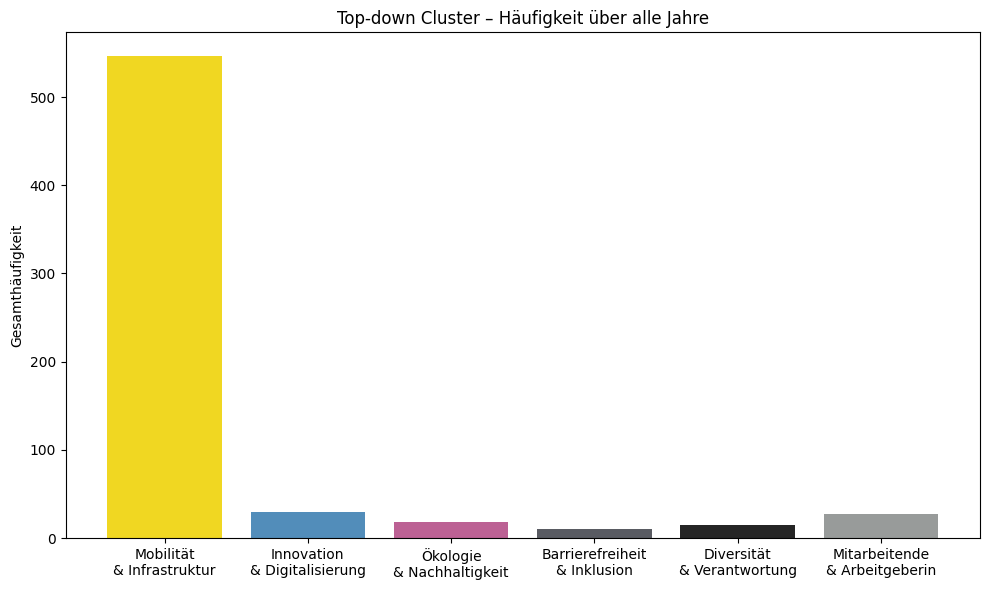

In [77]:
# Überblick: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
cluster_summaries = cluster_totals(df_bvg_clean, clusters_topdown)

# Plott: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
# Vorbereitung
# Farbzuordnung
cluster_color_map = {
    "Mobilität & Infrastruktur": "#F0D722",
    "Innovation & Digitalisierung": "#528DBA",
    "Ökologie & Nachhaltigkeit": "#BC6194",
    "Barrierefreiheit & Inklusion": "#595B62",
    "Diversität & Verantwortung": "#252525",
    "Mitarbeitende & Arbeitgeberin": "#989B9A"
}

plot_cluster_totals(
    cluster_summaries,
    title="Top-down Cluster – Häufigkeit über alle Jahre",
    color_palette=cluster_color_map    
)

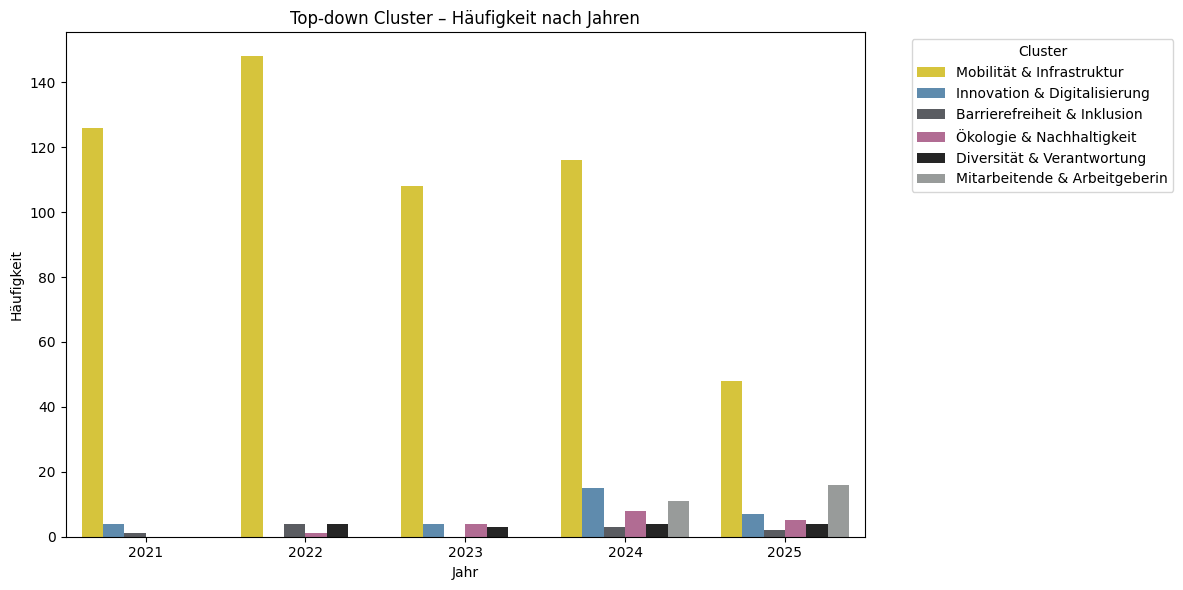

In [78]:
# Entwicklung: Häufigkeit je Cluster über die Jahre (ausgelagerte Funktion)
# Häufigkeit nach Jahr
cluster_by_year_df = cluster_totals_by_year(df_bvg_clean, clusters_topdown)

# Plot    
plot_cluster_by_year(cluster_by_year_df, 
                     title="Top-down Cluster – Häufigkeit nach Jahren",
                     color_palette=cluster_color_map)

In [79]:
# Entwicklung: Clustertrends über die Jahre 
# Tabellenansicht: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_table(df_bvg_clean, clusters_topdown, label="Top-down")


Top-down – Begriffsentwicklung im Cluster: Mobilität & Infrastruktur
word  ausbau  linie  mobilität  mobilitätswende  nahverkehr  netz  verkehr  \
year                                                                         
2021       0      6          0                0           0     2      118   
2022       0      0          1                1           0     0      146   
2023       3      1          4                0           2     3       95   
2024       4     14         15                4           3     2       69   
2025       0      6         13                0           6     0       22   

word  verlässlichkeit  
year                   
2021                0  
2022                0  
2023                0  
2024                5  
2025                1  

Top-down – Begriffsentwicklung im Cluster: Innovation & Digitalisierung
word  app  technologie  zukunft
year                           
2021    0            0        4
2023    0            0        4
2024    7     

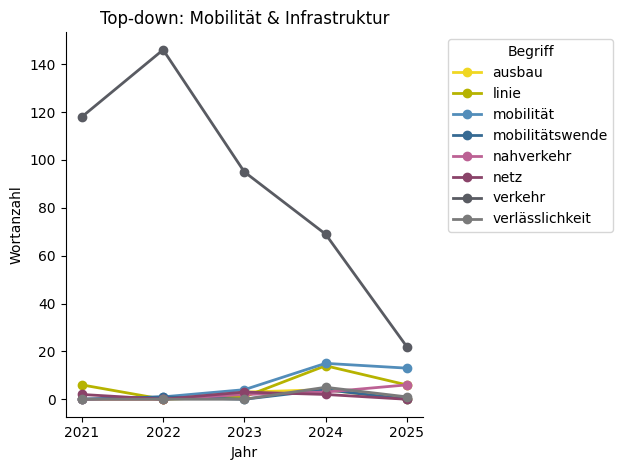

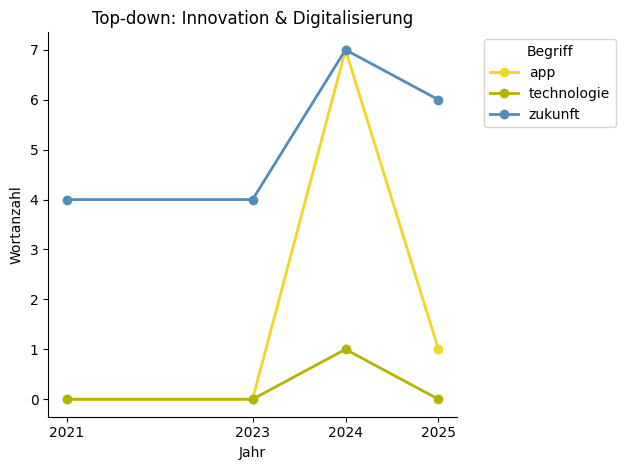

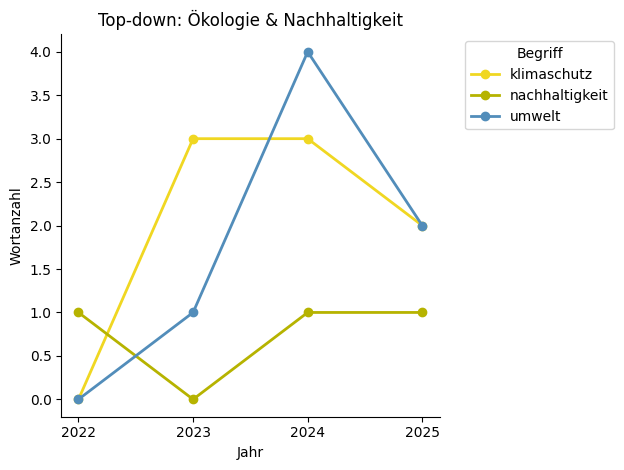

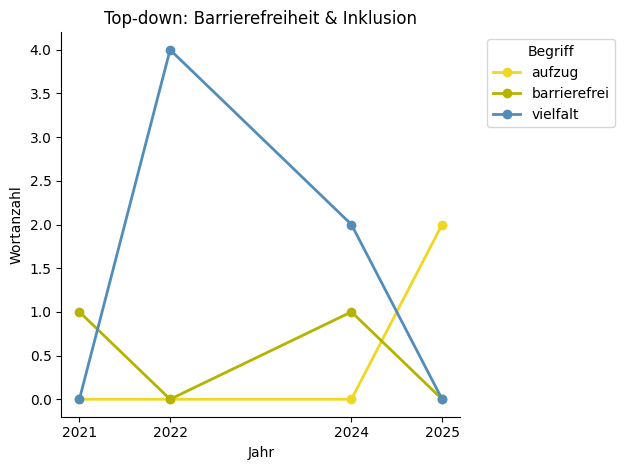

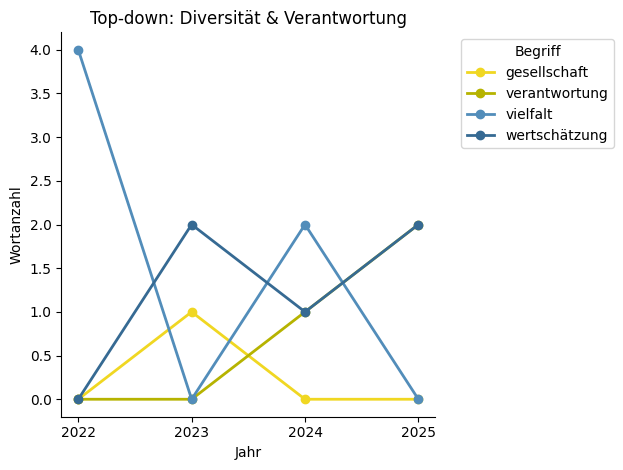

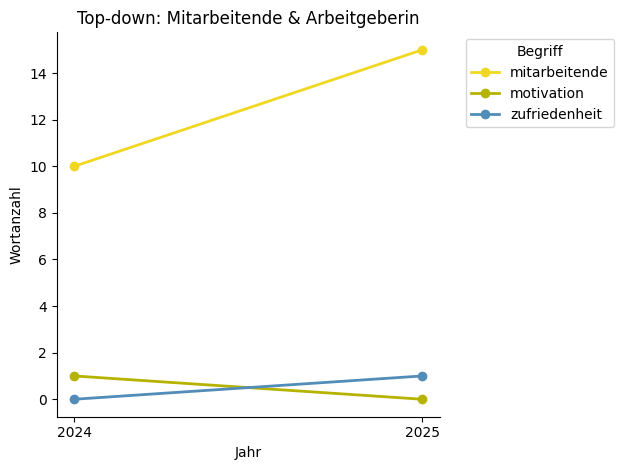

In [80]:
# Entwicklung: Clustertrends über die Jahre 
# Plott: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_plot(df_bvg_clean, clusters_topdown, label="Top-down")

##### 3.2 Bottom-up-Perspektive: Explorativ gebildete Themencluster

In [81]:
# Cluster und Begriffe definieren
clusters_bottomup = {
    "Betriebs- & Infrastrukturthemen": ["bauarbeiten", "haltestelle", "einsatz", "bahnhof", "fahren", "fahrzeuge", "betriebshof", "ersatzverkehr", "betrieb", "sicherheit", "netz"],
    "Arbeitskonflikte": ["verdi", "gewerkschaft", "tarif", "verhandlungsrunde", "tarifrunde", "schlichtung", "einigung"], 
    "Verkehrsmittel": ["bus", "busse", "u-bahn", "zug", "straßenbahn", "straßenbahnen"],
    "Service & Kundennähe": ["kunden", "angebot", "ersatzverkehr", "fahrgäste"],
    "Produkte & Innovationen": ["deutschlandticket", "berlkönig", "jelbi", "muva"]
}

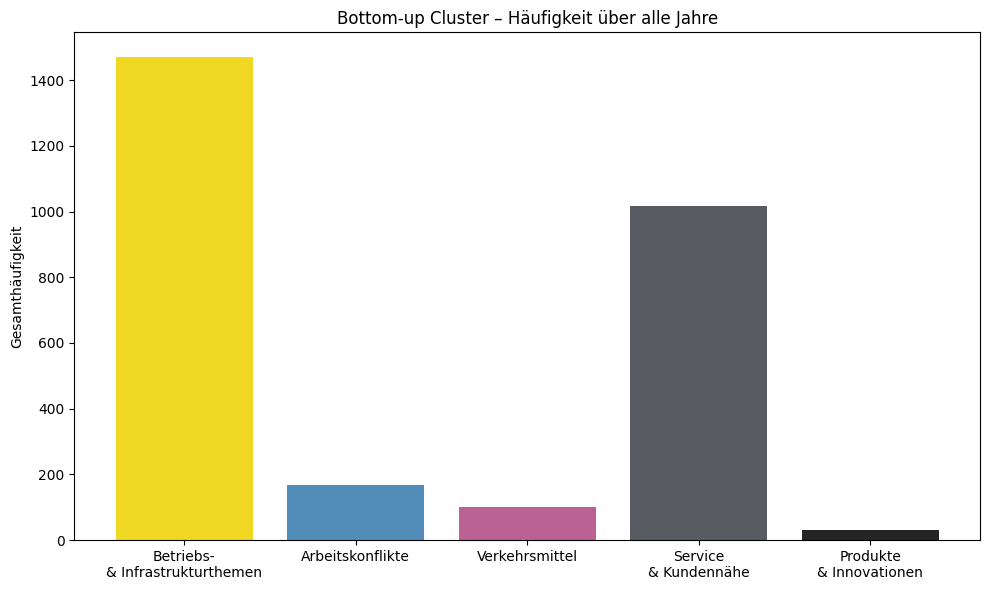

In [82]:
# Überblick: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
cluster_summaries = cluster_totals(df_bvg_clean, clusters_bottomup)

# Plott: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
# Vorbereitung
# Farbzuordnung
cluster_color_map = {
    "Betriebs- & Infrastrukturthemen": "#F0D722",
    "Arbeitskonflikte": "#528DBA",
    "Verkehrsmittel": "#BC6194",
    "Service & Kundennähe": "#595B62",
    "Produkte & Innovationen": "#252525"
}

plot_cluster_totals(
    cluster_summaries,
    title="Bottom-up Cluster – Häufigkeit über alle Jahre",
    color_palette=cluster_color_map)  

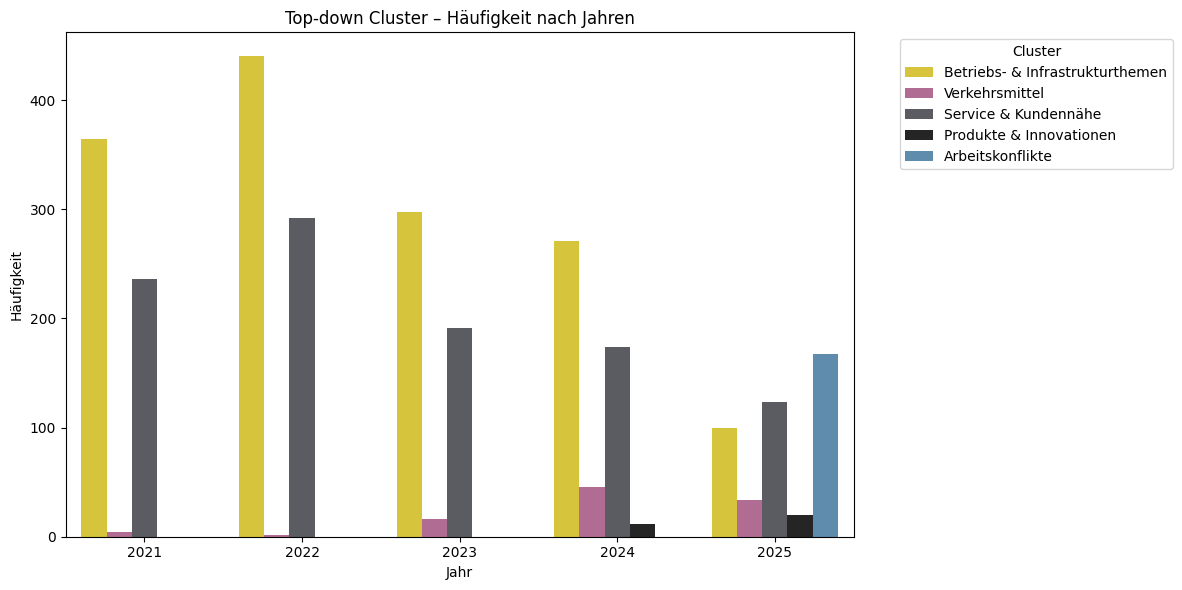

In [83]:
# Entwicklung: Häufigkeit je Cluster über die Jahre (ausgelagerte Funktion)
# Häufigkeit nach Jahr
cluster_by_year_df = cluster_totals_by_year(df_bvg_clean, clusters_bottomup)

# Plot    
plot_cluster_by_year(cluster_by_year_df, 
                     title="Top-down Cluster – Häufigkeit nach Jahren",
                     color_palette=cluster_color_map)

In [84]:
# Entwicklung: Clustertrends über die Jahre 
# Alle Wörter, gruppiert nach Jahr
top_words_by_year = (
    df_bvg_clean.groupby(["year", "word"])["count"]
    .sum()
    .reset_index()
)

# Schleife: Pro Jahr Top 50 Wörter ausgeben
top_n = 50
for year in sorted(top_words_by_year["year"].dropna().unique()):
    print(f"\nTop {top_n} Wörter im Jahr {int(year)}:")
    top_words = (
        top_words_by_year[top_words_by_year["year"] == year]
        .sort_values("count", ascending=False)
        .head(top_n)
    )
    print(top_words[["word", "count"]].to_string(index=False))


Top 50 Wörter im Jahr 2021:
               word  count
             werden    816
       technologien    696
                 zb    465
        akzeptieren    464
              daten    464
       einwilligung    464
                bvg    363
                 an    348
            betrieb    234
      informationen    234
          gestalten    233
             erfolg    233
          webseiten    232
      vergleichbare    232
          verwenden    232
      reibungslosen    232
            werbung    232
           webseite    232
          angebotes    232
        akzeptierst    232
            angebot    232
        analysieren    232
         widerrufen    232
             zwecke    232
        passgenauer    232
             person    232
             brücke    232
       bvgwebseiten    232
        deaktiviert    232
          jederzeit    232
   nichtnotwendigen    232
             messen    232
       erforderlich    232
           ablehnen    232
datenschutzhinweise    232

In [85]:
# Tabellenansicht: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_table(df_bvg_clean, clusters_bottomup, label="Bottom-up")


Bottom-up – Begriffsentwicklung im Cluster: Betriebs- & Infrastrukturthemen
word  bahnhof  bauarbeiten  betrieb  betriebshof  einsatz  ersatzverkehr  \
year                                                                       
2021        1            0      234            2        4              2   
2022        0            0      293            0        0              0   
2023        0            0      186            4        3              2   
2024        9            1      141            0       19              0   
2025        7            0       51            3        8              0   

word  fahren  fahrzeuge  haltestelle  netz  sicherheit  
year                                                    
2021       0          3            0     2         116  
2022       0          1            0     0         146  
2023       4          2            0     3          93  
2024       6         24            1     2          68  
2025       5          4            0     0      

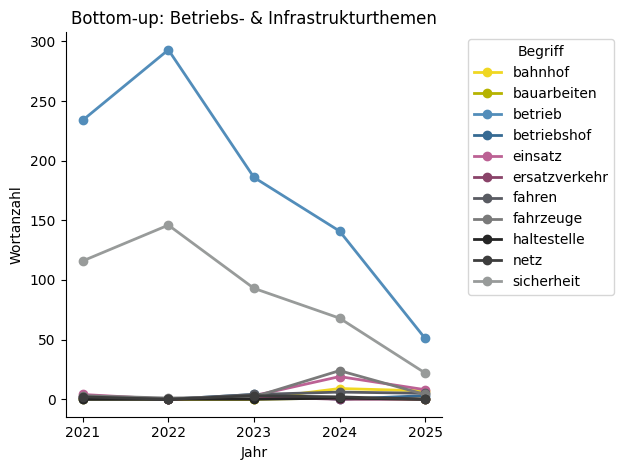

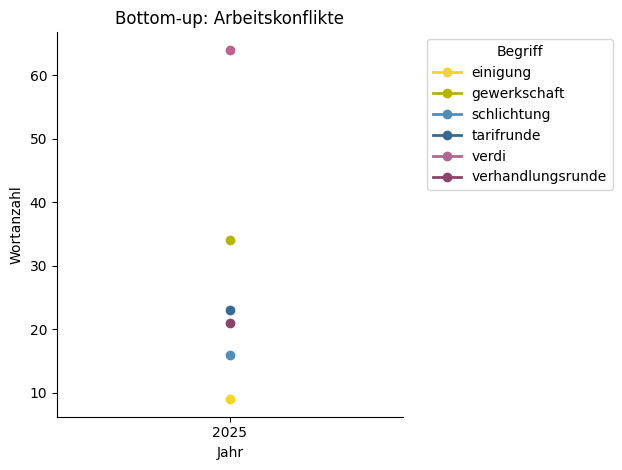

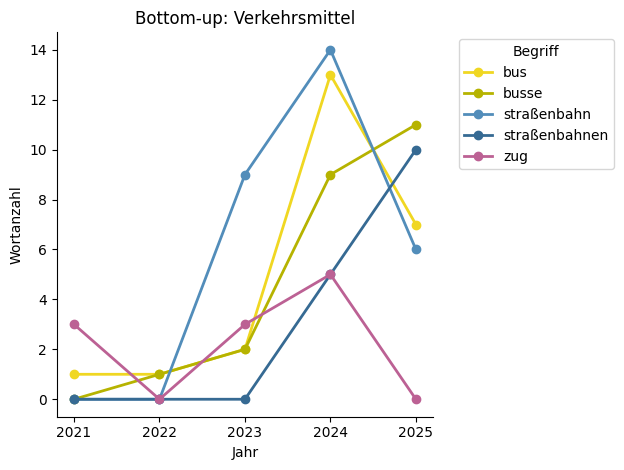

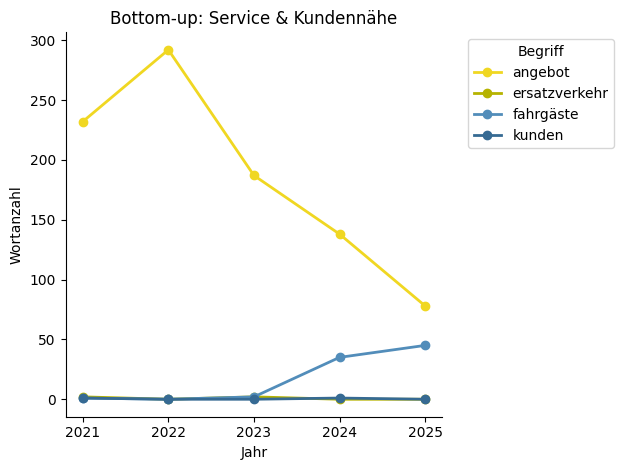

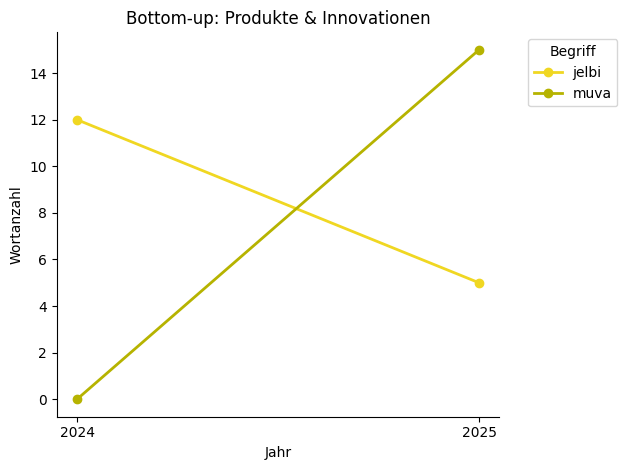

In [86]:
# Entwicklung: Clustertrends über die Jahre 
# Plott: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_plot(df_bvg_clean, clusters_bottomup, label="Bottom-up")